## Jupiler Pro League Shots

Hi everyone!

This week we explore shot locations for the Jupiler Pro League using the [tiled shot maps tutorial](https://www.sonofacorner.com/shot-maps-a-matplotlib-tutorial/).

### Imports

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
import matplotlib.gridspec as gridspec

# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch

from PIL import Image
import urllib
import os

As opposed to other examples, from now on I'll be using [matplotlib sytlesheets](https://matplotlib.org/stable/tutorials/introductory/customizing.html) to create my visuals and save a ton of lines of code.

In [222]:
font_path = "../assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("../assets/stylesheets/soc_base.mplstyle")

### Reading and groupping the data

In [223]:
df = pd.read_csv('data/belgian_shots_08292022.csv', index_col=0)

We begin by getting an overview of the locations we wish to use for our bins.

In [224]:
pitch = VerticalPitch(pitch_type='uefa')
pitch.dim

FixedDims(pitch_width=68.0, pitch_length=105.0, goal_width=7.32, goal_length=2.0, six_yard_width=18.32, six_yard_length=5.5, penalty_area_width=40.32, penalty_area_length=16.5, circle_diameter=18.3, corner_diameter=2.0, arc=53.05, invert_y=False, origin_center=False, left=0.0, right=105.0, bottom=0.0, top=68.0, aspect=1.0, width=68.0, length=105.0, goal_bottom=30.34, goal_top=37.66, six_yard_left=5.5, six_yard_right=99.5, six_yard_bottom=24.84, six_yard_top=43.16, penalty_left=11.0, penalty_right=94.0, penalty_area_left=16.5, penalty_area_right=88.5, penalty_area_bottom=13.84, penalty_area_top=54.16, center_width=34.0, center_length=52.5, x_markings_sorted=array([  0. ,   5.5,  11. ,  16.5,  52.5,  88.5,  94. ,  99.5, 105. ]), y_markings_sorted=array([ 0.  , 13.84, 24.84, 30.34, 37.66, 43.16, 54.16, 68.  ]), pitch_extent=array([  0., 105.,   0.,  68.]), positional_x=array([  0. ,  16.5,  34.5,  52.5,  70.5,  88.5, 105. ]), positional_y=array([ 0.  , 13.84, 24.84, 43.16, 54.16, 68.  ]),

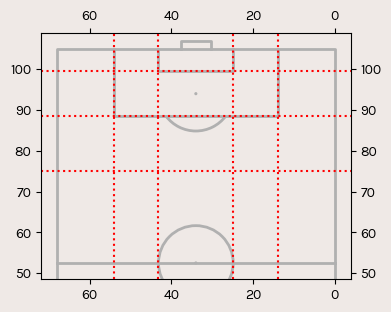

In [225]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='uefa',
    half=True,
    axis=True, 
    label=True, 
    tick=True,
    goal_type='box'
)
pitch.draw(ax = ax)

ax.plot([13.84, 13.84], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
ax.plot([54.16, 54.16], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
ax.plot([24.84, 24.84], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
ax.plot([43.16, 43.16], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')

ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [88.5,88.5], ls=':', color='red')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [99.5,99.5], ls=':', color='red')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [75,75], ls=':', color='red')

Ok, now we define a function that returns the zone based on the following criteria. This is probably not the best way to do this...

In [226]:
zone_areas = {
    'zone_1':{
        'x_lower_bound': 54.16, 'x_upper_bound': 68,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_2':{
        'x_lower_bound': 0, 'x_upper_bound': 13.84,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_3':{
        'x_lower_bound': 54.16, 'x_upper_bound': 68,
        'y_lower_bound': 20, 'y_upper_bound': 88.5,
    },
    'zone_4':{
        'x_lower_bound': 0, 'x_upper_bound': 13.84,
        'y_lower_bound': 20, 'y_upper_bound': 88.5,
    },
    'zone_5':{
        'x_lower_bound': 13.84, 'x_upper_bound': 24.84,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_6':{
        'x_lower_bound': 43.16, 'x_upper_bound': 54.16,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_7':{
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 88.5, 'y_upper_bound': 99.5,
    },
    'zone_8':{
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 99.5, 'y_upper_bound': 105,
    },
    'zone_9':{
        'x_lower_bound': 13.84, 'x_upper_bound': 24.84,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_10':{
        'x_lower_bound': 43.16, 'x_upper_bound': 54.16,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_11':{
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_12':{
        'x_lower_bound': 13.84, 'x_upper_bound': 54.16,
        'y_lower_bound': 20, 'y_upper_bound': 75,
    }
}

In [227]:
def assign_shot_zone(x,y):
    '''
    This function returns the zone based on the x & y coordinates of the shot
    taken.
    Args:
        - x (float): the x position of the shot based on a vertical grid.
        - y (float): the y position of the shot based on a vertical grid.
    '''

    global zone_areas

    # Conditions

    for zone in zone_areas:
        if (x >= zone_areas[zone]['x_lower_bound']) & (x <= zone_areas[zone]['x_upper_bound']):
            if (y >= zone_areas[zone]['y_lower_bound']) & (y <= zone_areas[zone]['y_upper_bound']):
                return zone

We check that everything is working fine...

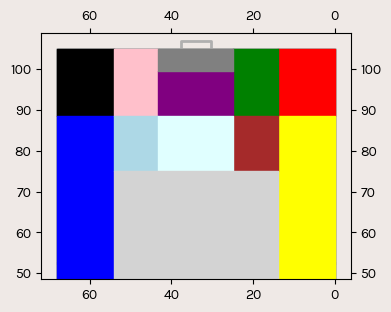

In [228]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='uefa',
    half=True,
    axis=True, 
    label=True, 
    tick=True,
    goal_type='box'
)
pitch.draw(ax = ax)

zone_colors = {
    'zone_1': 'black',
    'zone_2': 'red',
    'zone_3': 'blue',
    'zone_4': 'yellow',
    'zone_5': 'green',
    'zone_6': 'pink',
    'zone_7': 'purple',
    'zone_8': 'grey',
    'zone_9': 'brown',
    'zone_10': 'lightblue',
    'zone_11': 'lightcyan',
    'zone_12': 'lightgrey'
}

for zone in zone_colors:
    x_lim = [zone_areas[zone]['x_lower_bound'], zone_areas[zone]['x_upper_bound']]
    y1 = zone_areas[zone]['y_lower_bound']
    y2 = zone_areas[zone]['y_upper_bound']
    ax.fill_between(x=x_lim, y1=y1, y2=y2, color=zone_colors[zone]) 

Awesome.

Now we can assign the zone to each shot of our `df`, but remember that first we need to invert the `x` and `y` values, since we are using a vertical pitch.

In [229]:
df.rename(columns={'x':'y', 'y':'x'}, inplace=True)
df = df[df['situation'] != 'Penalty'].reset_index(drop=True)

In [230]:
df['zone_area'] = [assign_shot_zone(x,y) for x,y in zip(df['x'], df['y'])]
df

,teamId,playerId,playerName,min,xG,eventType,teamColor,match_id,isOwnGoal,y,x,situation,teamName,zone_area
0,8342,861932,Andreas Skov Olsen,10,0.003634,AttemptSaved,#206890,3916952,False,97.666670,22.808154,RegularPlay,Club Brugge,zone_5
1,9987,604044,Junya Ito,13,0.126060,AttemptSaved,#005098,3916952,False,99.307018,21.687133,RegularPlay,Genk,zone_5
2,9987,351661,Patrik Hrosovsky,16,0.082423,AttemptSaved,#005098,3916952,False,94.289477,21.266752,RegularPlay,Genk,zone_5
3,9987,1067741,Luca Oyen,16,0.101404,AttemptSaved,#005098,3916952,False,93.699997,45.542165,RegularPlay,Genk,zone_6
4,9987,351661,Patrik Hrosovsky,17,0.032583,AttemptSaved,#005098,3916952,False,81.696605,32.703749,FromCorner,Genk,zone_11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,9997,1080028,Daichi Hayashi,70,0.039299,AttemptSaved,#204888,3916964,False,89.199997,39.881190,RegularPlay,St.Truiden,zone_7
1186,9997,725695,Aboubakary Koita,76,0.043673,AttemptSaved,#204888,3916964,False,81.696605,40.805716,RegularPlay,St.Truiden,zone_11
1187,9997,196805,Gianni Bruno,76,0.441264,Goal,#204888,3916964,False,97.956139,40.301428,RegularPlay,St.Truiden,zone_7
1188,9997,725695,Aboubakary Koita,90,0.056909,AttemptSaved,#204888,3916964,False,95.929825,46.873376,RegularPlay,St.Truiden,zone_6


In [231]:
data = df.groupby(['teamId', 'teamName', 'teamColor', 'zone_area']).apply(lambda x: x.shape[0]).reset_index()
data.rename(columns={0:'num_shots'}, inplace=True)

total_shots = data.groupby(['teamId'])['num_shots'].sum().reset_index()
total_shots.rename(columns={'num_shots':'total_shots'}, inplace=True)

data = pd.merge(data, total_shots, on='teamId', how='left')
data['pct_shots'] = data['num_shots']/data['total_shots']

In [217]:
data

,teamId,teamName,teamColor,zone_area,num_shots,total_shots,pct_shots
0,1773,OH Leuven,#406830,zone_1,1,68,0.014706
1,1773,OH Leuven,#406830,zone_10,5,68,0.073529
2,1773,OH Leuven,#406830,zone_11,16,68,0.235294
3,1773,OH Leuven,#406830,zone_5,9,68,0.132353
4,1773,OH Leuven,#406830,zone_6,12,68,0.176471
...,...,...,...,...,...,...,...
142,149408,RFC Seraing,#333333,zone_5,6,62,0.096774
143,149408,RFC Seraing,#333333,zone_6,4,62,0.064516
144,149408,RFC Seraing,#333333,zone_7,26,62,0.419355
145,149408,RFC Seraing,#333333,zone_8,5,62,0.080645


## The Viz

Now we begin by creating the pitch fot a particular side and then generalize it into a function.

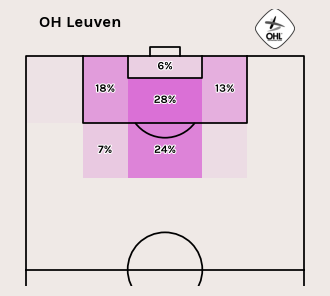

In [304]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)

pitch = VerticalPitch(
    pitch_type='uefa',
    half=True,
    goal_type='box',
    linewidth=1.25,
    line_color='black',
    spot_scale=0.0
)
pitch.draw(ax = ax)

plot_df = data[data['teamId'] == 1773]
max_value = plot_df['pct_shots'].max()
team_name = plot_df['teamName'].iloc[0]
team_color = plot_df['teamColor'].iloc[0]
team_id = plot_df['teamId'].iloc[0]

for zone in plot_df['zone_area']:
    shot_pct = plot_df[plot_df['zone_area'] == zone]['pct_shots'].iloc[0]
    x_lim = [zone_areas[zone]['x_lower_bound'], zone_areas[zone]['x_upper_bound']]
    y1 = zone_areas[zone]['y_lower_bound']
    y2 = zone_areas[zone]['y_upper_bound']
    ax.fill_between(
        x=x_lim, 
        y1=y1, y2=y2, 
        color='#DA70D6', alpha=(shot_pct/max_value),
        zorder=0, ec='None')
    if shot_pct > 0.05:
        x_pos = x_lim[0] + abs(x_lim[0] - x_lim[1])/2
        y_pos = y1 + abs(y1 - y2)/2
        text_ = ax.annotate(
            xy=(x_pos, y_pos),
            text=f'{shot_pct:.0%}',
            ha='center',
            va='center',
            color='black',
            weight='bold',
            size=8
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
        )

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
ax_coords = DC_to_NFC((12,101))
ax_size = 0.1
image_ax = fig.add_axes(
    [ax_coords[0], ax_coords[1], ax_size, ax_size],
    fc='None'
)
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png')).convert('LA')
image_ax.imshow(club_icon)
image_ax.axis('off')
ax_text(
    x=65, y=115,
    s=team_name,
    ax=ax,
    weight='bold',
    size=12
)

In [382]:
def plot_shot_location(ax, fig, teamId, df=data):
    '''
    This functions plots the shot location grid for a team.
    '''
    global zone_areas
    data = df.copy()

    pitch = VerticalPitch(
        pitch_type='uefa',
        half=True,
        goal_type='box',
        linewidth=1.25,
        line_color='black',
        spot_scale=0.0
    )
    pitch.draw(ax = ax)

    plot_df = data[data['teamId'] == teamId]
    max_value = plot_df['pct_shots'].max()
    team_name = plot_df['teamName'].iloc[0]
    team_color = plot_df['teamColor'].iloc[0]
    team_id = plot_df['teamId'].iloc[0]
    total_shots = plot_df['total_shots'].iloc[0]

    # Grids
    ax.plot([13.84, 13.84], [40, 88.5], ls='--', color='black', lw=1)
    ax.plot([54.16, 54.16], [40, 88.5], ls='--', color='black', lw=1)
    ax.plot([24.84, 24.84], [99.5, 88.5], ls='--', color='black', lw=1)
    ax.plot([43.16, 43.16], [99.5, 88.5], ls='--', color='black', lw=1)

    ax.plot([68, 54.16], [88.5,88.5], ls='--', color='black', lw=1)
    ax.plot([0.5, 13.84], [88.5,88.5], ls='--', color='black', lw=1)
    ax.plot([13.84, 54.16], [75,75], ls='--', color='black', lw=1)

    for zone in plot_df['zone_area']:
        shot_pct = plot_df[plot_df['zone_area'] == zone]['pct_shots'].iloc[0]
        x_lim = [zone_areas[zone]['x_lower_bound'], zone_areas[zone]['x_upper_bound']]
        y1 = zone_areas[zone]['y_lower_bound']
        y2 = zone_areas[zone]['y_upper_bound']
        ax.fill_between(
            x=x_lim, 
            y1=y1, y2=y2, 
            color='#DA70D6', alpha=(shot_pct/max_value),
            zorder=0, ec='None')
        if shot_pct > 0.05:
            x_pos = x_lim[0] + abs(x_lim[0] - x_lim[1])/2
            if y1 == 20:
                y1 = 58
            y_pos = y1 + abs(y1 - y2)/2
            text_ = ax.annotate(
                xy=(x_pos, y_pos),
                text=f'{shot_pct:.0%}',
                ha='center',
                va='center',
                color='black',
                weight='bold',
                size=7
            )
            text_.set_path_effects(
                [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
            )
    # -- Transformation functions
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # -- Take data coordinates and transform them to normalized figure coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((11,62.5))
    ax_size = 0.021
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None', anchor='C'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png')).convert('LA')
    image_ax.imshow(club_icon)
    image_ax.axis('off')
    ax_text(
        x=65, y=120,
        s=f'{team_name} <| shots {total_shots:.0f}>',
        highlight_textprops=[{'size':7, 'weight':'normal'}],
        ax=ax,
        weight='bold',
        size=10,
        font='DM Sans'
    )
    
    return ax

## The Final details

In [358]:
order_teams = total_shots.sort_values(by='total_shots', ascending=False)

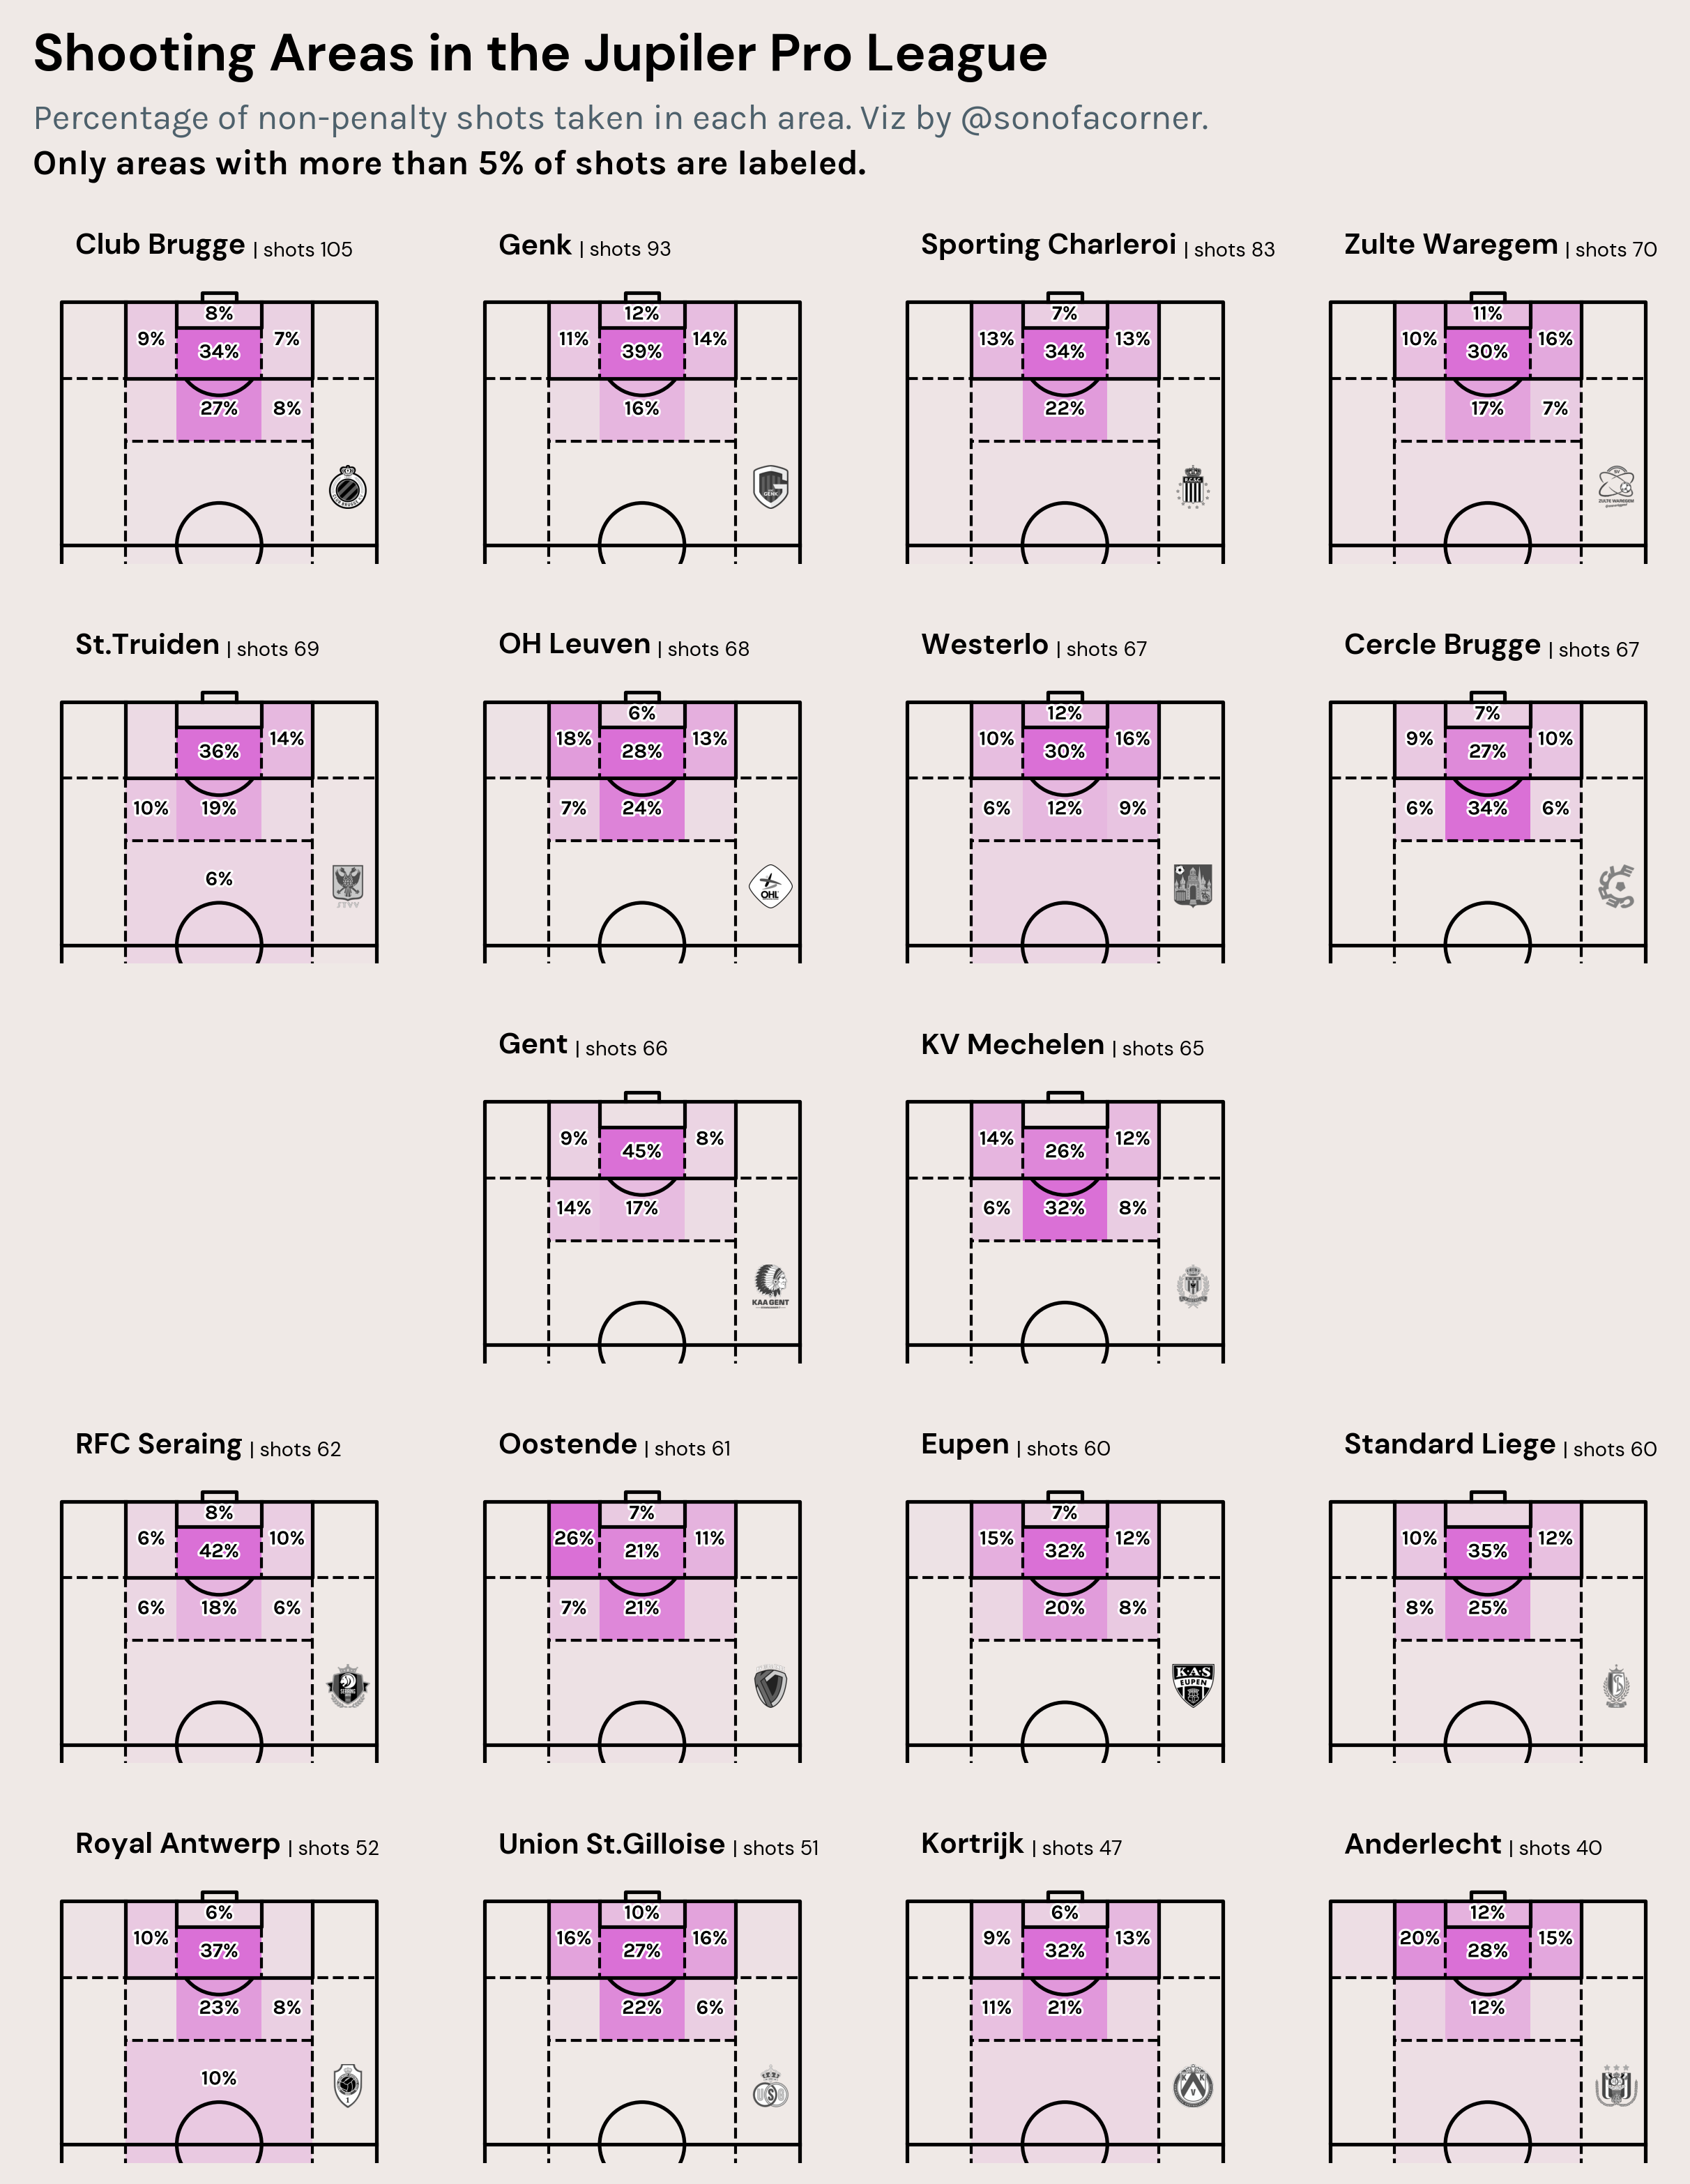

In [384]:
layout_ = '''
    ABCD
    EFGH
    .JK.
    MNOP
    IQRL
'''

height_ratios = [1]*5

fig = plt.figure(figsize=(10,12), dpi=300)
axs = fig.subplot_mosaic(
    layout_, 
    gridspec_kw={
        'height_ratios':height_ratios,
    }
)

counter = 0
for k, ax in axs.items():
    teamId = order_teams['teamId'].iloc[counter]
    plot_shot_location(ax, fig, teamId=teamId)
    counter += 1

fig_text(
    x = 0.12, y = .95, 
    s = "Shooting Areas in the Jupiler Pro League",
    va = "bottom", ha = "left",
    fontsize = 18, color = "black", font = "DM Sans", weight = "bold"
)
fig_text(
	x = 0.12, y = .91, 
    s = "Percentage of non-penalty shots taken in each area. Viz by @sonofacorner.\n<Only areas with more than 5% of shots are labeled.>",
    highlight_textprops=[{"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 12, color = "#4E616C", font = "Karla"
)

plt.savefig(
	"figures/08292022_jupiler_shots.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/08292022_jupiler_shots_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)